In [21]:
import pandas as pd
import numpy as np
import cv2 as cv
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from numpy import array
from sys import getsizeof
import os

ims_files = os.listdir('/Users/jacobmetz/Documents/GitHub/facebook-marketplaces-recommendation-ranking-system/data/resized_images')

print(len(ims_files))

image_arrays = []

# for file in ims_files:
#     image = io.imread(f'/Users/jacobmetz/Documents/GitHub/facebook-marketplaces-recommendation-ranking-system/data/resized_images/{file}')
#     array1 = np.asarray(image)
#     array2 = array1.reshape(-1)
#     image_arrays.append(array2)

# categorys = [0, 1, 2, 3, 4, 1, 1, 1, 2, 3, 0, 1, 2, 3, 4, 1, 1, 1, 2, 3]

# X = np.array(image_arrays)
# y = np.array(categorys)

# data = np.vstack((X,y))

# print(data)

# df = pd.DataFrame(data)
# df

12668


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg.fit(X, y)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

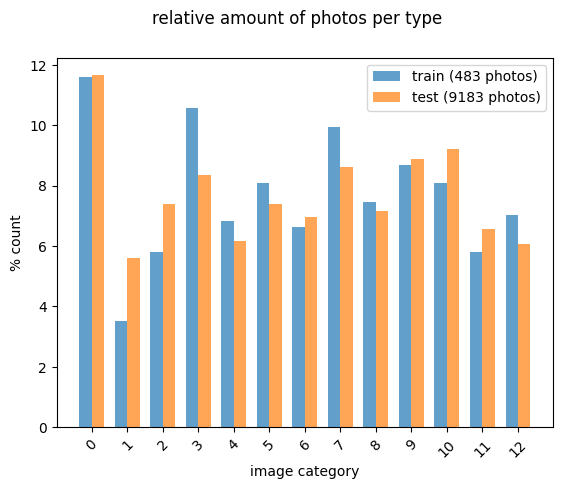

In [2]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('image category')
    plt.ylabel(ylabel_text)

plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [6]:
import pandas as pd
df = pd.read_csv('data/data_csvs/indexed_data.csv', lineterminator="\n")
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'product_id', 'product_name', 'category',
       'product_description', 'price', 'location', 'id', 'category_index'],
      dtype='object')


In [7]:
print(df['product_description'].iloc[10])

Double Pine bed frame good condition. Reasonable offer considered.easy to assemble. Buyer to collect


In [8]:
from transformers import BertTokenizer, BertModel
import torch

model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

example_text = df['product_description'].iloc[10]

bert_input = tokenizer(example_text, padding='max_length', max_length=20,
                       truncation=True, return_tensors="pt")

output = model(**bert_input)

print(output)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-2.6164e-01,  1.0305e-01,  7.3397e-02,  ..., -4.0926e-03,
           2.9706e-01,  3.1256e-01],
         [ 2.3428e-02,  5.1746e-01,  1.5096e-01,  ..., -3.3987e-02,
           1.0377e-01, -9.9866e-02],
         [ 2.8870e-01,  2.0801e-01,  5.7271e-01,  ...,  3.4489e-01,
           7.7483e-01, -4.1583e-01],
         ...,
         [-6.2463e-01, -4.2524e-01,  9.8171e-02,  ...,  1.7640e-01,
           1.0161e-01, -5.8433e-02],
         [-4.9068e-01, -2.9955e-01, -2.8930e-01,  ...,  4.3037e-01,
           3.1476e-01,  7.1141e-04],
         [ 2.1380e-01,  1.5419e-01, -3.4705e-01,  ..., -4.9823e-02,
          -5.3694e-01,  6.1990e-02]]], grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-7.2549e-01, -2.1275e-01,  2.1567e-01,  4.3948e-01, -2.6115e-01,
         -1.4761e-02,  7.4982e-01,  2.4610e-01,  3.7652e-01, -9.9981e-01,
          3.3041e-01, -1.0183e-01,  9.5904e-01, -1.4401e-01,  8.0473e-01,
         -3.4805e-

In [10]:
print(df['category_index'])

0         0
1         0
2         0
3         0
4         0
         ..
12599    11
12600    11
12601    11
12602    11
12603    11
Name: category_index, Length: 12604, dtype: int64


In [11]:
print(df['category'])

0        Home & Garden / Dining, Living Room Furniture ...
1                    Home & Garden / Other Household Goods
2                    Home & Garden / Other Household Goods
3        Home & Garden / Garden & Patio / Outdoor Setti...
4        Home & Garden / Dining, Living Room Furniture ...
                               ...                        
12599    Video Games & Consoles / Other Video Games & C...
12600    Video Games & Consoles / Video Game Accessorie...
12601    Video Games & Consoles / Video Game Accessorie...
12602                       Video Games & Consoles / Games
12603                       Video Games & Consoles / Games
Name: category, Length: 12604, dtype: object
